# Diagnosis of Dementia

Dementia is a neurological disorder which results in loss of memory, impairment in thinking and interpersonal skills, problems with coordination and motor skills, paranoia, hallucinations, etc. In this notebook, the input dataset consists of MRI images of the brain. The dataset is divided into a training set and a test set to effectively train and evaluate the models. It has four classes of images both in training as well as a testing set: Mild Demented, Moderate Demented, Non Demented and Very Mild Demented. Various Machine learning algorithms are applied to get the most efficient way to diagnose the various stages of Dementia.

The different Machine Learning algorithms used here are:


*   Kernel Support Vector Machine
*   Radial Basis Function
*   Voting Based Classifier
*   Multilayer Perceptron
*   Support Vector Machine
*   Decision Tree
*   Extreme Gradient Boosting
*   Naïve Bayes
*   K Nearest Neighbour
*   Logistic Regression
*   Random Forest
*   Gaussian Mixture Model

On comparing the results obtained from these models, I could conclude that Kernel Support Vector Machine and Radial Basis Function will give accurate results.


# Import Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import cv2
import glob
import matplotlib.pyplot as plt
import random
from random import randint
from pathlib import Path
import os
import cv2
import skimage
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
import matplotlib.pyplot as plt

##Load Data

In [ ]:
mildTrain='drive/My Drive/Dementia/MildDemented/'
moderateTrain='drive/My Drive/Dementia/ModerateDemented/'
nonTrain='drive/My Drive/Dementia/NonDemented/'
vmildTrain='drive/My Drive/Dementia/VeryMildDemented/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x=[]
y=[]

In [ ]:
for filename in os.listdir(mildTrain):
  img=cv2.imread(mildTrain + filename)
  if img is not None:
    y.append(1)
    img=cv2.resize(img,(240,320))
    x.append(img)

In [ ]:
for filename in os.listdir(moderateTrain):
  img=cv2.imread(moderateTrain + filename)
  if img is not None:
    y.append(0)
    img=cv2.resize(img,(240,320))
    x.append(img)

In [ ]:
for filename in os.listdir(nonTrain):
  img=cv2.imread(nonTrain + filename)
  if img is not None:
    y.append(1)
    img=cv2.resize(img,(240,320))
    x.append(img)

In [ ]:
for filename in os.listdir(vmildTrain):
  img=cv2.imread(vmildTrain + filename)
  if img is not None:
    y.append(0)
    img=cv2.resize(img,(240,320))
    x.append(img)

In [ ]:
x

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
data=x

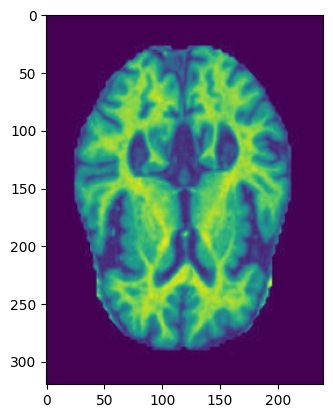

In [ ]:
data_gray = [ cv2.cvtColor(i, cv2.COLOR_BGR2GRAY) for i in data]
plt.imshow(data_gray[0])

In [ ]:
ppc=16
hog_images=[]
hog_features=[]
for image in data_gray:
  fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
  hog_images.append(hog_image)
  hog_features.append(fd)

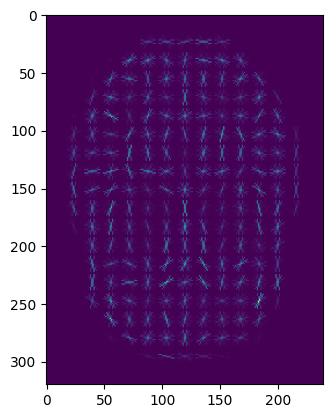

In [ ]:
plt.imshow(hog_images[0])

In [ ]:
len(hog_features)

1857

In [ ]:
df=pd.DataFrame(hog_features)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,26102,26103,26104,26105,26106,26107,26108,26109,26110,26111
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
hog_features = np.array(hog_features)

**Principal Component Analysis**


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pcahog = PCA(n_components=20).fit(hog_features)

In [ ]:
hog_features = pcahog.transform(hog_features)

In [ ]:
hog_features

array([[ 5.03462923e+00, -1.75617325e+00, -1.63070842e+00, ...,
        -8.23172062e-01, -3.10330689e-01, -4.13710544e-01],
       [ 5.09604468e+00, -2.56171151e+00, -1.51251588e+00, ...,
         6.12338146e-01,  4.01342291e-01, -5.98438486e-01],
       [ 5.22308925e+00, -2.55180129e+00, -2.06638048e+00, ...,
        -2.28102733e-01, -4.38845600e-02, -5.15548645e-03],
       ...,
       [-2.16998318e+00,  2.68073040e-01,  4.56280674e-01, ...,
         6.77715578e-02, -1.29225432e+00,  6.57091128e-01],
       [-2.00558372e+00,  1.59288707e+00, -1.52338398e+00, ...,
         2.81066478e-01, -5.00847066e-01,  3.29203696e-01],
       [-1.06265916e+00,  2.38469258e+00, -1.13978119e+00, ...,
         1.10556145e-01,  1.93173116e-02,  1.05717210e-01]])

In [ ]:
data_frame = []
for i in range(len(hog_features)):
    data_frame.append(np.hstack((hog_features[i],y[i])))

np.random.shuffle(data_frame)

In [ ]:
percentage = 70
partition = int(len(hog_features)*percentage/100)

In [ ]:
data_frame = np.array(data_frame)
x_train, x_test = data_frame[:partition,:-1],  data_frame[partition:,:-1]
y_train, y_test = data_frame[:partition,-1:].ravel() , data_frame[partition:,-1:].ravel()


In [ ]:
print(x_train.shape)
print(x_test.shape)

(1299, 20)
(558, 20)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Machine Learning Classification Algorithms

**Support Vector Machine (SVM)**

Accuracy for SVM: 0.8870967741935484


              precision    recall  f1-score   support

         0.0       0.83      0.71      0.77       146
         1.0       0.90      0.95      0.93       412

    accuracy                           0.89       558
   macro avg       0.87      0.83      0.85       558
weighted avg       0.88      0.89      0.88       558



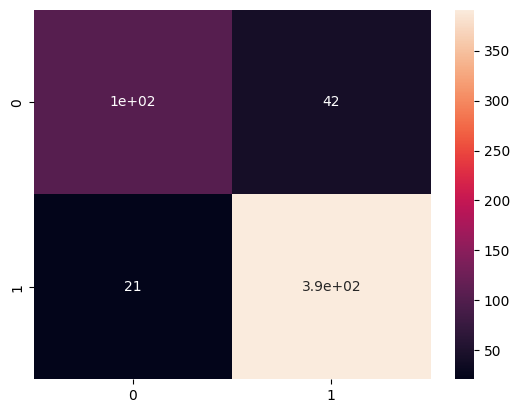

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy for SVM: "+str(accuracy_score(y_test, y_pred)))
print('\n')
conf2 = confusion_matrix(y_test, y_pred)
sns.heatmap(conf2, annot=True)
print(classification_report(y_test, y_pred))

**Naive Bayes Classifier**

Accuracy for Naive Bayes: 0.7903225806451613


              precision    recall  f1-score   support

         0.0       0.60      0.58      0.59       146
         1.0       0.85      0.87      0.86       412

    accuracy                           0.79       558
   macro avg       0.73      0.72      0.72       558
weighted avg       0.79      0.79      0.79       558



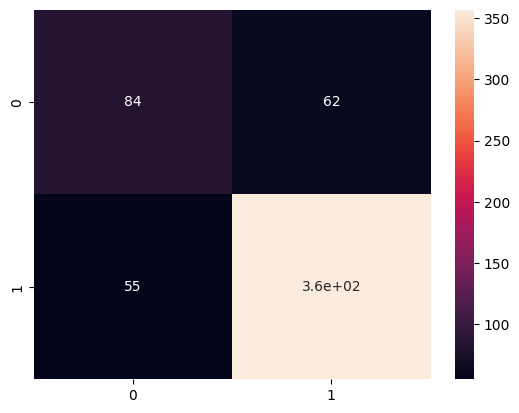

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print("Accuracy for Naive Bayes: "+str(accuracy_score(y_test, y_pred)))
print('\n')
conf2 = confusion_matrix(y_test, y_pred)
sns.heatmap(conf2, annot=True)
print(classification_report(y_test, y_pred))

**Decision Tree Classifier**

Accuracy for Decision Tree: 0.8476702508960573


              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71       146
         1.0       0.90      0.90      0.90       412

    accuracy                           0.85       558
   macro avg       0.80      0.80      0.80       558
weighted avg       0.85      0.85      0.85       558



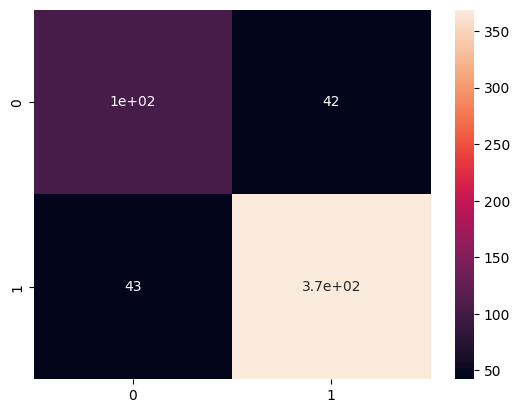

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy')
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy for Decision Tree: "+str(accuracy_score(y_test, y_pred)))
print('\n')
conf2 = confusion_matrix(y_test, y_pred)
sns.heatmap(conf2, annot=True)
print(classification_report(y_test, y_pred))

**Multilayer Perceptron Classifier**

Accuracy for MLP CLassifier: 0.9229390681003584


              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86       146
         1.0       0.96      0.94      0.95       412

    accuracy                           0.92       558
   macro avg       0.90      0.91      0.90       558
weighted avg       0.92      0.92      0.92       558



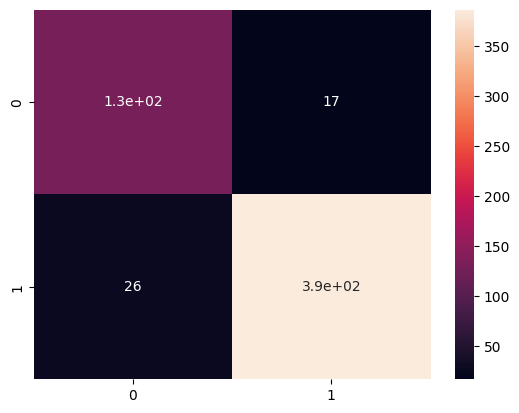

In [ ]:
from sklearn.neural_network import MLPClassifier
claf = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1)
claf.fit(x_train,y_train)
y_pred=claf.predict(x_test)
print("Accuracy for MLP CLassifier: "+str(accuracy_score(y_test, y_pred)))
print('\n')
conf2 = confusion_matrix(y_test, y_pred)
sns.heatmap(conf2, annot=True)
print(classification_report(y_test, y_pred))

**Logistic Regression Classifier**

Accuracy for Logistic Regression CLassifier: 0.7652329749103942


              precision    recall  f1-score   support

         0.0       0.57      0.40      0.47       146
         1.0       0.81      0.89      0.85       412

    accuracy                           0.77       558
   macro avg       0.69      0.65      0.66       558
weighted avg       0.75      0.77      0.75       558



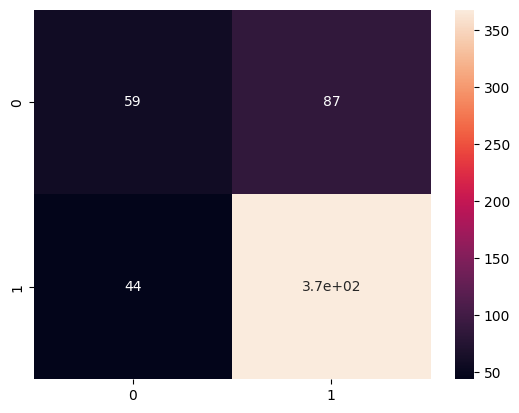

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy for Logistic Regression CLassifier: "+str(accuracy_score(y_test, y_pred)))
print('\n')
conf2 = confusion_matrix(y_test, y_pred)
sns.heatmap(conf2, annot=True)
print(classification_report(y_test, y_pred))

**K Nearest Neighbour Classifier**

Accuracy for K Nearest Neighbor CLassifier: 0.7652329749103942


              precision    recall  f1-score   support

         0.0       0.57      0.40      0.47       146
         1.0       0.81      0.89      0.85       412

    accuracy                           0.77       558
   macro avg       0.69      0.65      0.66       558
weighted avg       0.75      0.77      0.75       558



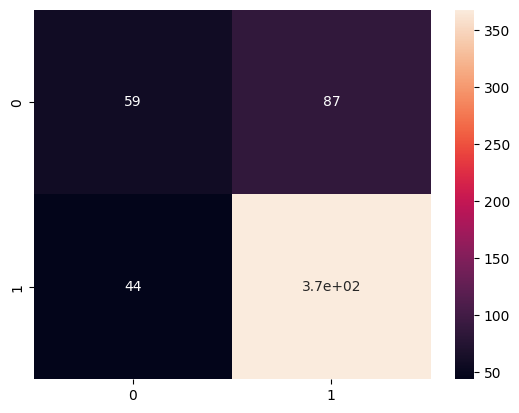

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy for K Nearest Neighbor CLassifier: "+str(accuracy_score(y_test, y_pred)))
print('\n')
conf2 = confusion_matrix(y_test, y_pred)
sns.heatmap(conf2, annot=True)
print(classification_report(y_test, y_pred))

**Extreme Gradient Boosting (XGB) Classifier**

Accuracy for extreme gradient boosting (XGB)  CLassifier: 0.8387096774193549


              precision    recall  f1-score   support

         0.0       0.73      0.60      0.66       146
         1.0       0.87      0.92      0.89       412

    accuracy                           0.84       558
   macro avg       0.80      0.76      0.78       558
weighted avg       0.83      0.84      0.83       558



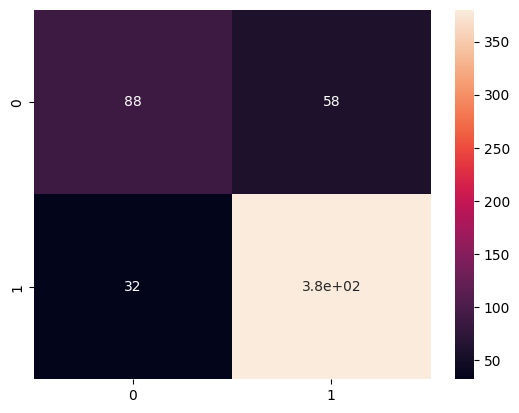

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy for extreme gradient boosting (XGB)  CLassifier: "+str(accuracy_score(y_test, y_pred)))
print('\n')
conf2 = confusion_matrix(y_test, y_pred)
sns.heatmap(conf2, annot=True)
print(classification_report(y_test, y_pred))

**Voting Based Classifier**

Hard Voting Score  0
Soft Voting Score  0
Accuracy for Voting Based Classifier: 0.9157706093189965


              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83       146
         1.0       0.93      0.96      0.94       412

    accuracy                           0.92       558
   macro avg       0.90      0.88      0.89       558
weighted avg       0.91      0.92      0.91       558



<Axes: >

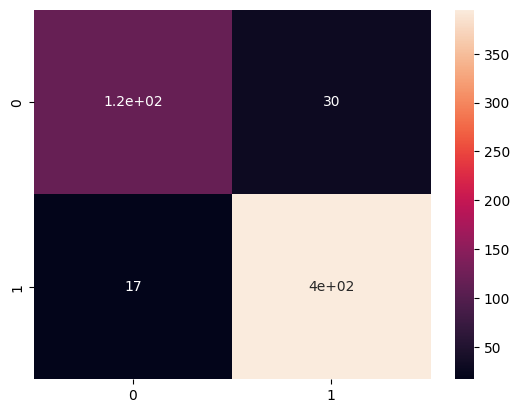

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

# group / ensemble of models
estimator = []
estimator.append(('GB', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)))
estimator.append(('MLP', MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))
estimator.append(('LR', LogisticRegression(random_state=0)))

# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(x_train,y_train)
y_pred = vot_hard.predict(x_test)

# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Hard Voting Score % d" % score)

# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(x_train,y_train)
y_pred = vot_soft.predict(x_test)

# using accuracy_score
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score % d" % score)
y_pred=vot_soft.predict(x_test)

print("Accuracy for Voting Based Classifier: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))
conf2 = confusion_matrix(y_test, y_pred)
sns.heatmap(conf2, annot=True)

**Gaussian Mixture Model**

Accuracy for Gaussian Mixture Model: 0.4103942652329749


              precision    recall  f1-score   support

         0.0       0.06      0.08      0.07       146
         1.0       0.62      0.53      0.57       412

    accuracy                           0.41       558
   macro avg       0.34      0.30      0.32       558
weighted avg       0.47      0.41      0.44       558



<Axes: >

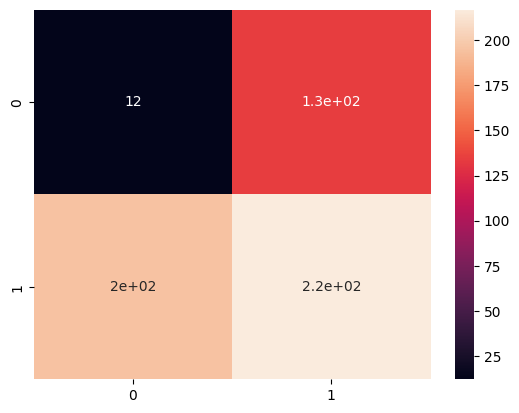

In [ ]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=0).fit(x_train,y_train)
y_pred=gm.predict(x_test)
print("Accuracy for Gaussian Mixture Model: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))
conf2 = confusion_matrix(y_test, y_pred)
sns.heatmap(conf2, annot=True)

**Random Forest Classifier**

Accuracy for Random Forest: 0.7419354838709677


              precision    recall  f1-score   support

         0.0       1.00      0.01      0.03       146
         1.0       0.74      1.00      0.85       412

    accuracy                           0.74       558
   macro avg       0.87      0.51      0.44       558
weighted avg       0.81      0.74      0.64       558



<Axes: >

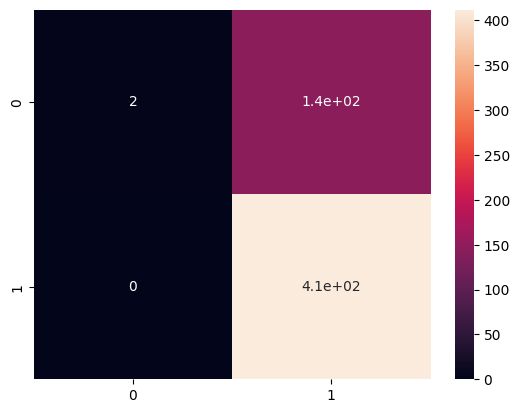

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy for Random Forest: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))
conf2 = confusion_matrix(y_test, y_pred)
sns.heatmap(conf2, annot=True)

**Kernal Support Vector Machine Classifier**

Accuracy for Kernal SVM: 0.9354838709677419


              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87       146
         1.0       0.94      0.98      0.96       412

    accuracy                           0.94       558
   macro avg       0.93      0.90      0.91       558
weighted avg       0.94      0.94      0.93       558



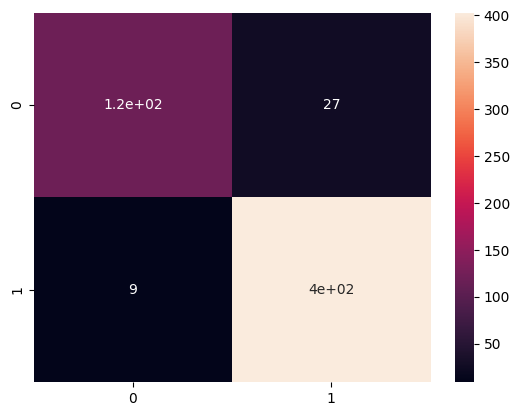

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy for Kernal SVM: "+str(accuracy_score(y_test, y_pred)))
print('\n')
conf2 = confusion_matrix(y_test, y_pred)
sns.heatmap(conf2, annot=True)
print(classification_report(y_test, y_pred))

**Radial Basis Function Classifier**

Accuracy for Radial Basis Function Kernal: 0.9354838709677419


              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87       146
         1.0       0.94      0.98      0.96       412

    accuracy                           0.94       558
   macro avg       0.93      0.90      0.91       558
weighted avg       0.94      0.94      0.93       558



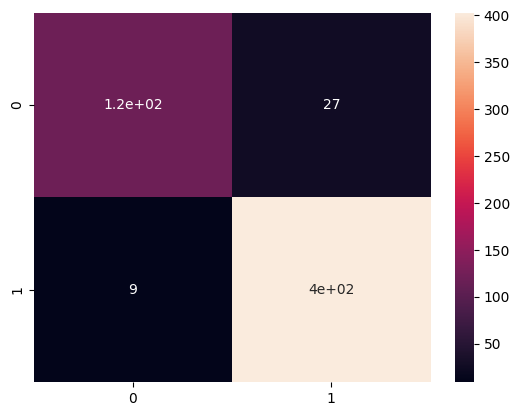

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel,random_state=0).fit(x_train,y_train)
gpc.score(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy for Radial Basis Function Kernal: "+str(accuracy_score(y_test, y_pred)))
print('\n')
conf2 = confusion_matrix(y_test, y_pred)
sns.heatmap(conf2, annot=True)
print(classification_report(y_test, y_pred))

# Visualization of Results

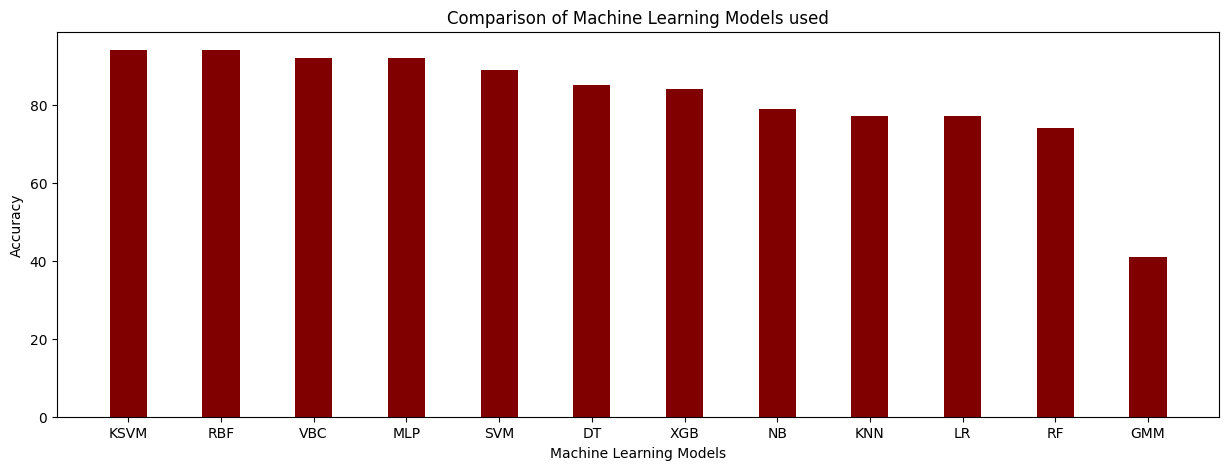

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'KSVM':94, 'RBF':94, 'VBC':92,
        'MLP':92, 'SVM':89, 'DT':85,
        'XGB':84, 'NB':79, 'KNN':77, 'LR':77, 'RF':74, 'GMM':41}
Models = list(data.keys())
Accuracy = list(data.values())

fig = plt.figure(figsize = (15, 5))

# creating the bar plot
plt.bar(Models, Accuracy, color ='maroon',
        width = 0.4)

plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Machine Learning Models used")
plt.show()



# Conclusion

Based on the accuracy of the different models, Kernel Support Vector Machine and Radial Basis Function have achieved the highest accuracy of 94% and therefore they will be efficient in diagnosing the different stages of Dementia.